# Import Libraries and Data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [113]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [115]:
label=data['Survived']

# Data Cleaning

In [116]:
missing_num=data.isnull().sum()
missing_num

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
percentage_cabin=float(data['Cabin'].isnull().sum())/data['Cabin'].shape[0]
print '{0}% of cabin data is missing'.format(round(percentage_cabin*100,2))

77.1% of cabin data is missing


In [118]:
percentage_age=float(data['Age'].isnull().sum())/data['Age'].shape[0]
print '{0}% of age data is missing'.format(round(percentage_age*100,2))

19.87% of age data is missing


In [119]:
mean_age=data['Age'].dropna().values.mean()
mean_age

29.69911764705882

In [120]:
test_mean_age=test['Age'].dropna().values.mean()
test_mean_age
test['Age']=test['Age'].fillna(test_mean_age)

In [121]:
data['Age']=data['Age'].fillna(mean_age)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [122]:
freq = data.Embarked.dropna().mode()[0]
freq
data['Embarked']=data['Embarked'].fillna(freq)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
test_freq = test.Embarked.dropna().mode()[0]
test_freq
test['Embarked']=test['Embarked'].fillna(test_freq)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
test_mean_fare=test['Fare'].dropna().values.mean()
test_mean_fare
test['Fare']=test['Fare'].fillna(test_mean_fare)

# Exploratory Data Analysis

In [125]:
pd.crosstab(data['Survived'],data['Pclass'],normalize='all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


In [126]:
pd.crosstab(data['Survived'],data['Sex'],normalize='all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [127]:
pd.crosstab(data['Survived'],data['Embarked'],normalize='all')

Embarked,C,Q,S
Survived,,,
0,0.084175,0.05275,0.479237
1,0.104377,0.03367,0.245791


D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


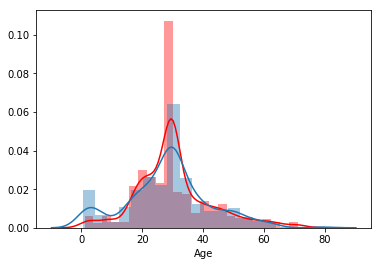

In [128]:
sns.distplot(data[data['Survived']==0]['Age'].dropna(),color='red')
sns.distplot(data[data['Survived']==1]['Age'].dropna())

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


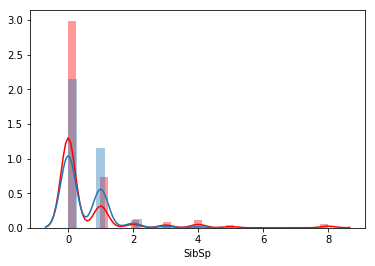

In [129]:
sns.distplot(data[data['Survived']==0]['SibSp'].dropna(),color='red')
sns.distplot(data[data['Survived']==1]['SibSp'].dropna())

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


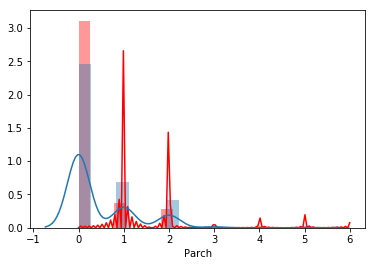

In [130]:
sns.distplot(data[data['Survived']==0]['Parch'].dropna(),color='red')
sns.distplot(data[data['Survived']==1]['Parch'].dropna())

D:\Annaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


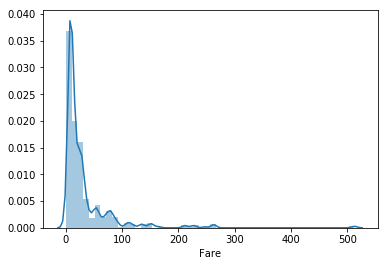

In [131]:
sns.distplot(data['Fare'].dropna())

<BarContainer object of 891 artists>

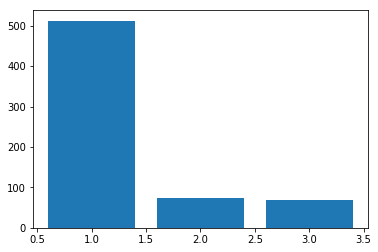

In [132]:
plt.bar(data['Pclass'],data['Fare'])

In [133]:
pd.crosstab(data['Survived'],data['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [134]:
pd.crosstab(data['Survived'],data['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [135]:
data[['Pclass','Survived']].groupby('Pclass').mean().sort_values('Pclass')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [136]:
data[['Embarked','Survived']].groupby('Embarked').mean().sort_values('Embarked')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [137]:
data[['Sex','Survived']].groupby('Sex').mean().sort_values('Sex')

,Survived
Sex,
female,0.742038
male,0.188908


# Feature Selection

In [138]:
combine=[data,test]

In [139]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [140]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [142]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [144]:
for dataset in combine:
    dataset['Embarked_S'] = dataset['Embarked'].map( {'S': 1, 'C': 0, 'Q': 0} ).astype(int)
    dataset['Embarked_C'] = dataset['Embarked'].map( {'C': 1, 'S': 0, 'Q': 0} ).astype(int)
    dataset['Embarked_Q'] = dataset['Embarked'].map( {'Q': 1, 'C': 0, 'S': 0} ).astype(int)

In [145]:
for dataset in combine:
    dataset['Isalone'] = np.where(dataset['FamilySize']==1, 1, 0)

In [165]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 6, 'newAge'] = 0
    dataset.loc[(dataset['Age'] > 6) & (dataset['Age'] <= 18), 'newAge'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 24), 'newAge'] = 1
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 38), 'newAge'] = 2
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 50), 'newAge'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 70), 'newAge'] = 4
    dataset.loc[ dataset['Age'] > 70, 'newAge']=5

In [148]:
for dataset in combine:
    dataset['Pclass_1'] = dataset['Pclass'].map( {1: 1, 2: 0, 3: 0} ).astype(int)
    dataset['Pclass_2'] = dataset['Pclass'].map( {2: 1, 1: 0, 3: 0} ).astype(int)
    dataset['Pclass_3'] = dataset['Pclass'].map( {3: 1, 1: 0, 2: 0} ).astype(int)

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Embarked_S,Embarked_C,Embarked_Q,Isalone,newAge,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,2,1,0,0,0,1.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,2,0,1,0,0,2.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,1,0,0,1,2.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,2,1,0,0,0,2.0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,1,1,0,0,1,2.0,0,0,1


In [150]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_S,Embarked_C,Embarked_Q,Isalone,newAge,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,1,1,2.0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,1,0,0,0,3.0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,1,1,4.0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,0,0,1,2.0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3,1,0,0,0,1.0,0,0,1


# Logistic Model

In [163]:
X_train = data[['Sex','newAge','Fare','Embarked_S','Embarked_C','Embarked_Q','Isalone','Pclass_1','Pclass_2','Pclass_3']]
Y_train = data['Survived']
X_test  = test[['Sex','newAge','Fare','Embarked_S','Embarked_C','Embarked_Q','Isalone','Pclass_1','Pclass_2','Pclass_3']]
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891L,), (418, 10))

In [166]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log =round(logreg.score(X_train, Y_train),3)
acc_log

0.802

In [167]:
submission = pd.DataFrame(
    { 'PassengerId':test['PassengerId'],'Survived': Y_pred},
    columns = [ 'PassengerId','Survived'])
submission.to_csv('submission.csv', index = False)